<a href="https://colab.research.google.com/github/SarathSabu/Python-Notebooks/blob/main/Latent_Dirichlet_Allocation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Mount the notebook to your Google Drive folder.

In [ ]:
from google.colab import drive
drive.mount('/drive')

Mounted at /drive


#### Opening INFO 617 Mental Health QA_LIWC.csv and load the data.

In [ ]:
import pandas as pd
QA = pd.read_csv('/drive/My Drive/Teaching/2025 Spring/INFO 617/Lecture 4 Feb 10/INFO 617 Mental Health QA_LIWC.csv', encoding='latin-1')
print(QA.head(5))

         QID                                   Question_English  \
0  100788023  Watching the elderly matchmaking program was v...   
1  100788009  Falling in love with someone else and breaking...   
2  100788013  I have been suffering from insomnia for half a...   
3  100788013  I have been suffering from insomnia for half a...   
4  100788013  I have been suffering from insomnia for half a...   

                                      Answer_English  Usefulness_vote  \
0  Hello. Let's start by talking about young peop...                2   
1  Hello! Sending you a virtual hug first. Thumbs...                2   
2  Hello! â I saw the issue you raised about in...                8   
3  Hello! â I saw the issue you raised about in...                8   
4  Hi, I just want to hug you. I can feel the kin...                6   

   Comment_count  Received_Bonus_Yes_No  Segment   WC  Analytic  Clout  ...  \
0              0                      0        1  359     52.91  83.28  ...   


#### Now, let's tokenize questions in this dataset at different levels.

In [ ]:
# Use the first question as an example
text = QA.loc[0, 'Question_English']
print(text)

Watching the elderly matchmaking program was very shocking. I found that many people participating in these matchmaking events are mainly looking for someone who can financially support them, preferably someone who is economically independent. The goal seems to be not just to find happiness in marriage, but also to find financial support. It feels like they are treating themselves as objects. The success rate seems to be very low, and I have seen many strange things, such as a mother trying to earn more money for her son, an old man who complains about his controlling ex-wife but is unwilling to take any responsibility, people who are vain and people with OCD. It's hard to describe the feeling. If everyone is maximizing their own interests during matchmaking, it probably won't work out. But being too selfless could also lead to a bad outcome. This feels especially realistic. No one seems to ask about feelings.


In [ ]:
# Let's start with word tokenization
# Here, we use the package nltk and its built-in function "word_tokenize"
# Make sure "punkt_tab" is downloaded
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt_tab')
tokens = word_tokenize(text)
print(tokens)
print(len(tokens))
# There are 173 tokens (words) in the first question.

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


['Watching', 'the', 'elderly', 'matchmaking', 'program', 'was', 'very', 'shocking', '.', 'I', 'found', 'that', 'many', 'people', 'participating', 'in', 'these', 'matchmaking', 'events', 'are', 'mainly', 'looking', 'for', 'someone', 'who', 'can', 'financially', 'support', 'them', ',', 'preferably', 'someone', 'who', 'is', 'economically', 'independent', '.', 'The', 'goal', 'seems', 'to', 'be', 'not', 'just', 'to', 'find', 'happiness', 'in', 'marriage', ',', 'but', 'also', 'to', 'find', 'financial', 'support', '.', 'It', 'feels', 'like', 'they', 'are', 'treating', 'themselves', 'as', 'objects', '.', 'The', 'success', 'rate', 'seems', 'to', 'be', 'very', 'low', ',', 'and', 'I', 'have', 'seen', 'many', 'strange', 'things', ',', 'such', 'as', 'a', 'mother', 'trying', 'to', 'earn', 'more', 'money', 'for', 'her', 'son', ',', 'an', 'old', 'man', 'who', 'complains', 'about', 'his', 'controlling', 'ex-wife', 'but', 'is', 'unwilling', 'to', 'take', 'any', 'responsibility', ',', 'people', 'who', 'a

In [ ]:
# Let's try sentence tokenization next
# Here, we use another built-in function called sent_tokenize
from nltk.tokenize import sent_tokenize
sents = sent_tokenize(text)
print(sents)
print(len(sents))
# There are 10 sentences in the first question.

['Watching the elderly matchmaking program was very shocking.', 'I found that many people participating in these matchmaking events are mainly looking for someone who can financially support them, preferably someone who is economically independent.', 'The goal seems to be not just to find happiness in marriage, but also to find financial support.', 'It feels like they are treating themselves as objects.', 'The success rate seems to be very low, and I have seen many strange things, such as a mother trying to earn more money for her son, an old man who complains about his controlling ex-wife but is unwilling to take any responsibility, people who are vain and people with OCD.', "It's hard to describe the feeling.", "If everyone is maximizing their own interests during matchmaking, it probably won't work out.", 'But being too selfless could also lead to a bad outcome.', 'This feels especially realistic.', 'No one seems to ask about feelings.']
10


#### Next, let's try to encode the words that appear in this question using one-hot encoding.

In [ ]:
# Encode words in the first question using one-hot encoding
print(tokens[:30])
pd.get_dummies(tokens)
# How many unique tokens are returned by the tokenization process?

['Watching', 'the', 'elderly', 'matchmaking', 'program', 'was', 'very', 'shocking', '.', 'I', 'found', 'that', 'many', 'people', 'participating', 'in', 'these', 'matchmaking', 'events', 'are', 'mainly', 'looking', 'for', 'someone', 'who', 'can', 'financially', 'support', 'them', ',']


,'s,",",.,But,I,If,It,No,OCD,The,...,treating,trying,unwilling,vain,very,was,who,with,wo,work
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
169,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
170,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
171,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


#### Next, let's represent the sentences in the first question using bag-of-words.

In [ ]:
# Represent sentences in the first question using bag-of-words.
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(sents)
print(vectorizer.get_feature_names_out().tolist())
print(X.toarray())

['about', 'also', 'an', 'and', 'any', 'are', 'as', 'ask', 'bad', 'be', 'being', 'but', 'can', 'complains', 'controlling', 'could', 'describe', 'during', 'earn', 'economically', 'elderly', 'especially', 'events', 'everyone', 'ex', 'feeling', 'feelings', 'feels', 'financial', 'financially', 'find', 'for', 'found', 'goal', 'happiness', 'hard', 'have', 'her', 'his', 'if', 'in', 'independent', 'interests', 'is', 'it', 'just', 'lead', 'like', 'looking', 'low', 'mainly', 'man', 'many', 'marriage', 'matchmaking', 'maximizing', 'money', 'more', 'mother', 'no', 'not', 'objects', 'ocd', 'old', 'one', 'out', 'outcome', 'own', 'participating', 'people', 'preferably', 'probably', 'program', 'rate', 'realistic', 'responsibility', 'seems', 'seen', 'selfless', 'shocking', 'someone', 'son', 'strange', 'success', 'such', 'support', 'take', 'that', 'the', 'their', 'them', 'themselves', 'these', 'they', 'things', 'this', 'to', 'too', 'treating', 'trying', 'unwilling', 'vain', 'very', 'was', 'watching', 'wh

In [ ]:
# Let's check the results
print(X.shape)
print(X[2])

(10, 110)
  (0, 88)	1
  (0, 40)	1
  (0, 85)	1
  (0, 33)	1
  (0, 76)	1
  (0, 96)	3
  (0, 9)	1
  (0, 60)	1
  (0, 45)	1
  (0, 30)	2
  (0, 34)	1
  (0, 53)	1
  (0, 11)	1
  (0, 1)	1
  (0, 28)	1


In [ ]:
# What are the two most similar sentences based on their bag-of-words vectors?
from sklearn.metrics.pairwise import cosine_similarity
simi_matrix = cosine_similarity(X)
print(simi_matrix.round(3))
# Print the two sentences that have the highest cosine similarity


def find_max_index(arr):
    max_value = 0  # Initialize with first element
    mi1, mi2 = 0, 0  # Initialize indices
    for i in range(1, len(arr)):
        for j in range(i, len(arr)):
            if (arr[i][j] > max_value) and (arr[i][j] < 0.9):
                max_value = arr[i][j]  # Assign the current element's value
                mi1, mi2 = i, j
    return (max_value, mi1, mi2)

print(find_max_index(simi_matrix))
print(sents[2], '\n', sents[4])
# Bag-of-words do not consider semantics

[[1.    0.066 0.069 0.    0.09  0.144 0.094 0.    0.    0.   ]
 [0.066 1.    0.073 0.062 0.236 0.    0.099 0.    0.    0.   ]
 [0.069 0.073 1.    0.    0.324 0.32  0.    0.31  0.    0.296]
 [0.    0.062 0.    1.    0.085 0.136 0.089 0.    0.167 0.   ]
 [0.09  0.236 0.324 0.085 1.    0.207 0.034 0.161 0.    0.24 ]
 [0.144 0.    0.32  0.136 0.207 1.    0.109 0.129 0.    0.154]
 [0.094 0.099 0.    0.089 0.034 0.109 1.    0.    0.    0.   ]
 [0.    0.    0.31  0.    0.161 0.129 0.    1.    0.    0.12 ]
 [0.    0.    0.    0.167 0.    0.    0.    0.    1.    0.   ]
 [0.    0.    0.296 0.    0.24  0.154 0.    0.12  0.    1.   ]]
(0.32378806290136664, 2, 4)
The goal seems to be not just to find happiness in marriage, but also to find financial support. 
 The success rate seems to be very low, and I have seen many strange things, such as a mother trying to earn more money for her son, an old man who complains about his controlling ex-wife but is unwilling to take any responsibility, people who

#### Then, let's generate n-grams from the questions.

In [ ]:
# Generate bigrams and trigrams from the first question.
# Here we use the function ngrams
from nltk import ngrams
bigrams = ngrams(tokens, 2)
trigrams = ngrams(tokens, 3)
print(list(bigrams))
print(list(trigrams))

[('Watching', 'the'), ('the', 'elderly'), ('elderly', 'matchmaking'), ('matchmaking', 'program'), ('program', 'was'), ('was', 'very'), ('very', 'shocking'), ('shocking', '.'), ('.', 'I'), ('I', 'found'), ('found', 'that'), ('that', 'many'), ('many', 'people'), ('people', 'participating'), ('participating', 'in'), ('in', 'these'), ('these', 'matchmaking'), ('matchmaking', 'events'), ('events', 'are'), ('are', 'mainly'), ('mainly', 'looking'), ('looking', 'for'), ('for', 'someone'), ('someone', 'who'), ('who', 'can'), ('can', 'financially'), ('financially', 'support'), ('support', 'them'), ('them', ','), (',', 'preferably'), ('preferably', 'someone'), ('someone', 'who'), ('who', 'is'), ('is', 'economically'), ('economically', 'independent'), ('independent', '.'), ('.', 'The'), ('The', 'goal'), ('goal', 'seems'), ('seems', 'to'), ('to', 'be'), ('be', 'not'), ('not', 'just'), ('just', 'to'), ('to', 'find'), ('find', 'happiness'), ('happiness', 'in'), ('in', 'marriage'), ('marriage', ','), 

#### Now, let's work on the implementation of TF-IDF.

In [ ]:
documents = ['The sky is blue', 'The sun is bright today', 'The sun in the sky is bright']

In [ ]:
# We use the function 'TfidfVectorizer' in sklearn to generate TF-IDF vectors.
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

documents_tfidf = vectorizer.fit_transform(documents)
vectorizer.get_feature_names_out()
print(documents_tfidf.toarray().round(3))

[[0.663 0.    0.    0.391 0.504 0.    0.391 0.   ]
 [0.    0.45  0.    0.35  0.    0.45  0.35  0.592]
 [0.    0.359 0.472 0.279 0.359 0.359 0.558 0.   ]]


In [ ]:
QC = pd.read_csv('/drive/My Drive/Teaching/2025 Spring/INFO 617/Lecture 5 Feb 17/INFO 617_QA_Question_Category.csv', encoding='latin-1')
print(QC.head(5))

         QID                                   Question_English  \
0  100788013  I have been suffering from insomnia for half a...   
1  100788017  I can't describe what exactly is "odd" about m...   
2  100788025  Always curious and wanting to experience hurti...   
3  100788036  Is it normal to express anger? Is it necessary...   
4  100788040  I dare not express my anger, but is it necessa...   

                                            Cat1  \
0                Mental and emotional well-being   
1                  Family dynamics and parenting   
2       Behavioral issues and undesirable habits   
3  Interpersonal relationships and social skills   
4                  Family dynamics and parenting   

                                            Cat2  
0                                Physical health  
1                Mental and emotional well-being  
2                Mental and emotional well-being  
3                Mental and emotional well-being  
4  Interpersonal relationship

In [ ]:
# Let's generate TF-IDF vectors for questions in this dataset.
# We use the function 'TfidfVectorizer' again
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

question_tfidf = vectorizer.fit_transform(QC['Question_English'])
vectorizer.get_feature_names_out()
print(question_tfidf.shape)

(3858, 12805)


In [ ]:
# What is most similar question to the first question in the dataset based on their TF-IDF vectors?
from sklearn.metrics.pairwise import cosine_similarity
most_simi_index = 0
most_simi_score = 0
for i in range(1, question_tfidf.shape[0]):
  simi_score = cosine_similarity(question_tfidf[0], question_tfidf[i])
  if simi_score > most_simi_score:
    most_simi_score = simi_score
    most_simi_index = i
print(most_simi_score, most_simi_index)

[[0.29483794]] 1904


In [ ]:
print(QC['Question_English'].iloc[0], '\n')
print(QC['Question_English'].iloc[most_simi_index])

I have been suffering from insomnia for half a year. I have difficulty falling asleep, and occasionally when I do, I get woken up by nightmares. I feel extremely exhausted physically, but my mind remains in an excited state, making it really difficult for me to fall asleep. I have tried various methods, such as drinking milk and foot baths before bed, but they have had the opposite effect, making it even harder for me to sleep. I used to be able to use boring textbooks to lull myself to sleep, but this year it doesn't work anymore, and I become more excited the more I read. I have also sought counseling, but after the counselor asked about my symptoms, they did not provide any advice on how to solve or alleviate them. I also tried self-hypnosis, but it had no effect. I attempted changing my environment, but I still got disturbed by various internal and external factors. I also tried to change my mental state, as I don't usually feel anxious. However, I still can't sleep. Even if I doze

#### Let's explore another use case of the TF-IDF vectors.

In [ ]:
# Each question has two category labels, "Cat1" and "Cat2", which indicate the
# most relevant topics that describe the nature of this question. Let's try to
# cluster these questions and see if the results will be consistent with the
# category labels.

# We focus on the first category label "Cat1"
from collections import Counter
Counter(QC['Cat1'])

# There are 11 category labels in total, but there are only a handful of questions in some categories.

Counter({'Mental and emotional well-being': 800,
         'Family dynamics and parenting': 929,
         'Behavioral issues and undesirable habits': 49,
         'Interpersonal relationships and social skills': 674,
         'Romantic relationships and marriage': 759,
         'Personal growth and self-development': 208,
         'Work, career, and employment': 272,
         'Education and school life': 153,
         'Sexuality and sex': 10,
         'Social incidents and cultural issues': 1,
         'Physical health': 3})

In [ ]:
# Let's try to cluster the questions into 8 clusters using their TF-IDF vectors.
# The code is simple -- we use the KMeans function in the sklearn package
# The results are stored in kmeans.labels_, which indicates the cluster index of each question

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=8, random_state=0).fit(question_tfidf)
print(kmeans.labels_)

[3 0 2 ... 6 5 2]


Counter({3: 736, 6: 508, 4: 503, 5: 486, 2: 457, 1: 437, 7: 393, 0: 338})


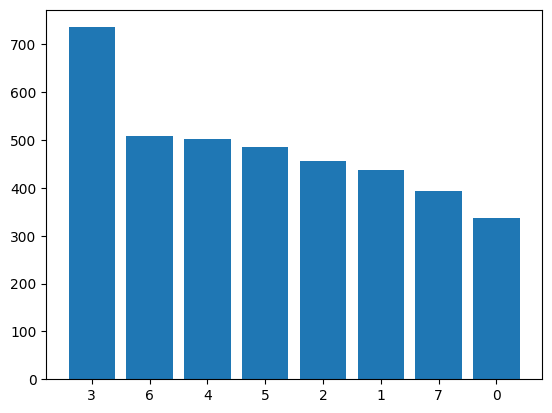

In [ ]:
# Check the distribution of questions grouped into each cluster
print(Counter(kmeans.labels_))
# Show the results in a barchart
import matplotlib.pyplot as plt
# Sort the bars from the highest to the lowest
plt.bar(range(8), [i[1] for i in Counter(kmeans.labels_).most_common(8)])
plt.xticks(range(8), [i[0] for i in Counter(kmeans.labels_).most_common(8)])
plt.show()

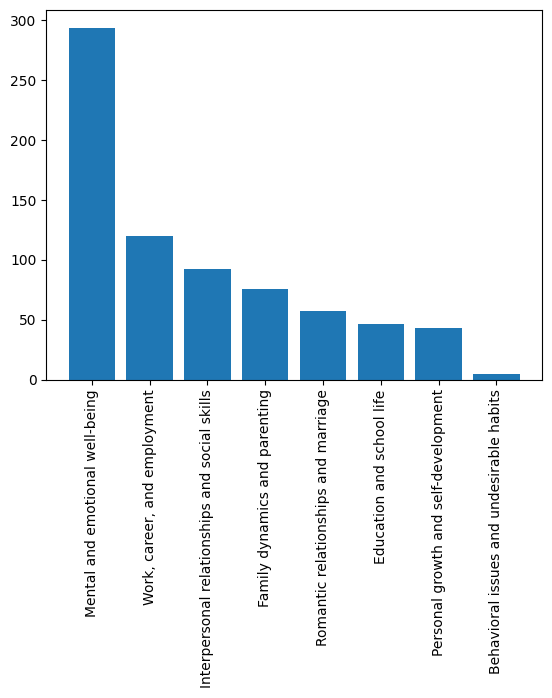

In [ ]:
# Check the label distribution ('Cat1') of questions grouped into each cluster
# Let's try the top two categories that include most questions, with indexes 3 and 6.
cluster_index = 3
cluster_labels = [i[1] for i in zip(kmeans.labels_, QC['Cat1']) if i[0] == cluster_index]


# Sort the bars from the highest to the lowest
plt.bar(range(8), [i[1] for i in Counter(cluster_labels).most_common(8)])
plt.xticks(range(8), [i[0] for i in Counter(cluster_labels).most_common(8)], rotation = 90)
plt.show()

#### Finally, let's implement LDA in this notebook.

In [ ]:
# Let's implement LDA for topic modeling on the questions
from sklearn.decomposition import LatentDirichletAllocation

# Assuming 'question_tfidf' is already calculated from previous code
lda = LatentDirichletAllocation(n_components=8, random_state=0) # You can adjust n_components
lda.fit(question_tfidf)

# Print the top words for each topic
for idx, topic in enumerate(lda.components_):
    print(f"Top 10 words for Topic #{idx}:")
    print([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[:-11:-1]]) # Adjust the number of words to display
    print("\n")

# Get the topic distribution for each document
topic_distribution = lda.transform(question_tfidf)

Top 10 words for Topic #0:
['significance', 'tranquility', 'grandpa', 'unworthiness', 'contagious', 'valentine', 'strike', 'firstborn', 'erupt', 'extremes']


Top 10 words for Topic #1:
['achievement', 'unconditional', 'aggression', 'unfulfilled', 'rebuild', 'therapists', 'powerã', 'favoritism', 'adopted', 'regressed']


Top 10 words for Topic #2:
['diabetes', 'moon', 'benefited', 'keys', 'hypochondria', 'gas', 'pseudo', 'autism', 'doll', 'lateral']


Top 10 words for Topic #3:
['drugs', 'listless', 'nuclear', 'chemistry', 'disinterest', 'loathe', 'languages', 'yue', 'ji', 'heights']


Top 10 words for Topic #4:
['translation', 'heartily', '360', 'raining', 'shards', 'kitten', 'relevant', 'da', 'choke', 'suitcase']


Top 10 words for Topic #5:
['lisa', 'charger', 'â¼â', 'blurt', 'battery', 'overeat', 'bloated', 'discrimination', 'victory', 'evasion']


Top 10 words for Topic #6:
['and', 'to', 'the', 'my', 'me', 'of', 'he', 'in', 'it', 'she']


Top 10 words for Topic #7:
['unhygienic', 

In [ ]:
# Example: Print the topic distribution for the first document
for i in range(8):
  print(f"Topic distribution for the first document: {topic_distribution[i]}", '\n')


Topic distribution for the first document: [0.01205684 0.01205683 0.01205684 0.01205684 0.01205684 0.01205684
 0.91560211 0.01205685] 

Topic distribution for the first document: [0.01201036 0.01201031 0.01201038 0.0658485  0.01201039 0.01206338
 0.86203627 0.0120104 ] 

Topic distribution for the first document: [0.02130965 0.02130965 0.02130965 0.02130965 0.02130965 0.02130965
 0.85083245 0.02130965] 

Topic distribution for the first document: [0.01112377 0.01112377 0.01112377 0.01112377 0.01112377 0.01112377
 0.92213358 0.01112378] 

Topic distribution for the first document: [0.01157868 0.01157868 0.01157868 0.01157868 0.01157868 0.01157868
 0.91894921 0.01157868] 

Topic distribution for the first document: [0.01162054 0.01162054 0.01162054 0.01162054 0.01162054 0.01162054
 0.91865619 0.01162054] 

Topic distribution for the first document: [0.0213493  0.02134929 0.0213493  0.0213493  0.12335076 0.0213493
 0.74855344 0.0213493 ] 

Topic distribution for the first document: [0.014

#### What we can see from the results is that most documents are heavily skewed toward the second to last topic, which is represented by words such as 'and', 'to', 'the', 'my', 'me', 'of', 'he', 'in', 'it', 'she'.

* Indeed, many of these words are in the list of "stop word" that do not have a strong semantic meaning. Hence, the common practice is to filter out these words before LDA.